In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
#import matplotlib.cm as cm
from matplotlib.colors import ListedColormap


import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('Iris.csv')
df=data.copy()

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [7]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [13]:
X = df.iloc[:,[1,2,3,4] ].values

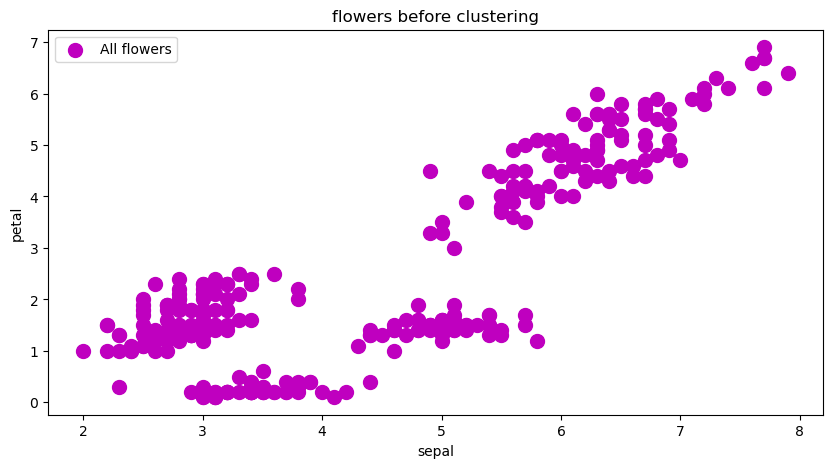

In [45]:
fig = plt.figure(figsize = (10,5))
plt.scatter(x=(X[:,0],X[:,1]),y=(X[:,2],X[:,3]),s=100,c='m',label='All flowers')
plt.title('flowers before clustering')
plt.xlabel('sepal')
plt.ylabel('petal')
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


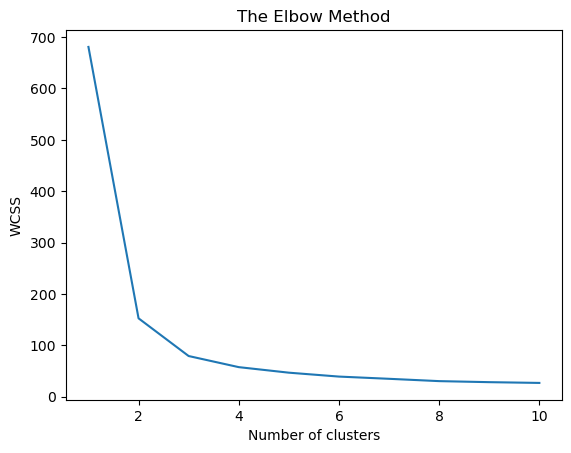

In [46]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [47]:
range_n_clusters = [2, 3, 4, 5, 6,7,8]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)



For n_clusters = 2 The average silhouette_score is : 0.6808136202936816
For n_clusters = 3 The average silhouette_score is : 0.5525919445499757
For n_clusters = 4 The average silhouette_score is : 0.4978256901095472
For n_clusters = 5 The average silhouette_score is : 0.48851755088862786
For n_clusters = 6 The average silhouette_score is : 0.36820569682713095
For n_clusters = 7 The average silhouette_score is : 0.3576975600180637
For n_clusters = 8 The average silhouette_score is : 0.359128386764561


In [48]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [49]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [50]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [51]:
X[y_kmeans==2,0]

array([6.9, 6.7, 6.3, 7.1, 6.3, 6.5, 7.6, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8,
       6.4, 6.5, 7.7, 7.7, 6.9, 7.7, 6.7, 7.2, 6.4, 7.2, 7.4, 7.9, 6.4,
       6.1, 7.7, 6.3, 6.4, 6.9, 6.7, 6.9, 6.8, 6.7, 6.7, 6.5, 6.2])

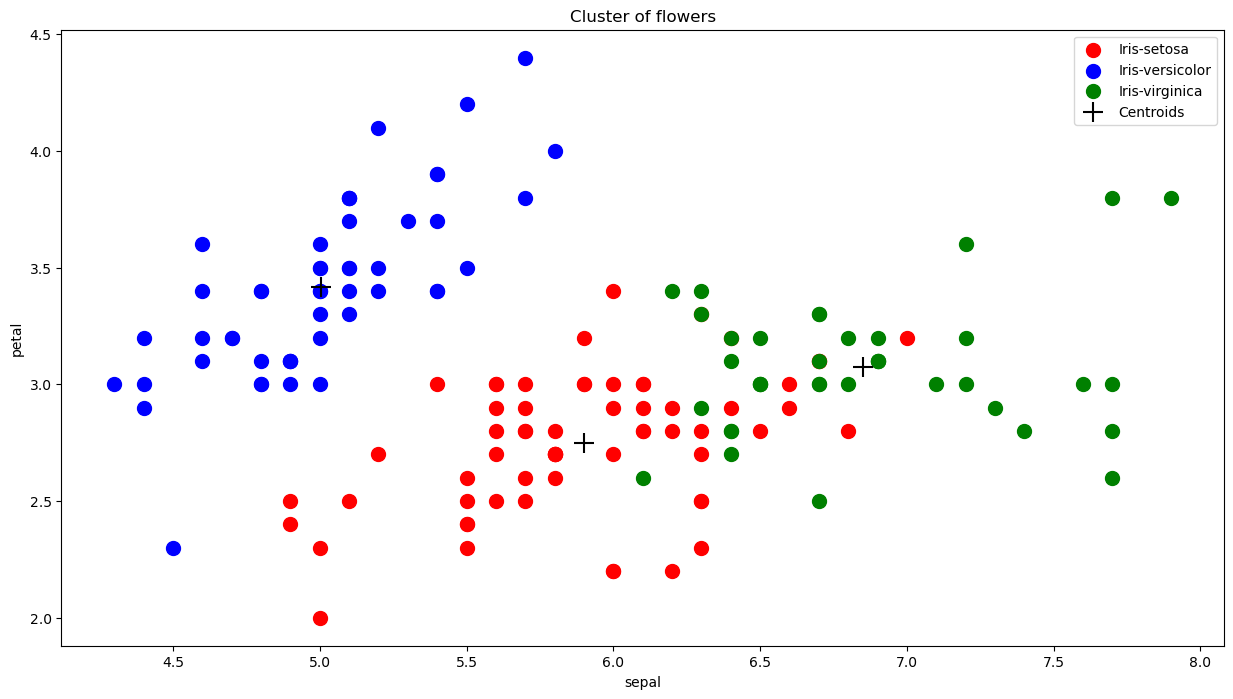

In [52]:
#Lets plot those clusters!
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolor')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='black',label='Centroids',marker = "+")
plt.title('Cluster of flowers')
plt.xlabel('sepal')
plt.ylabel('petal')
plt.legend()
plt.show()


In [53]:
#dendogram

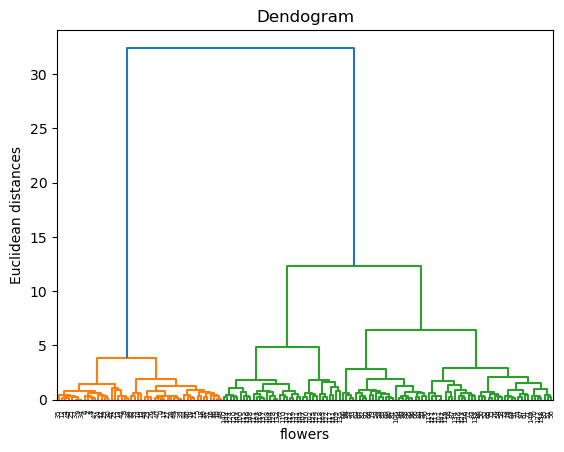

In [55]:
 import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(X,method='ward')) # Within cluster variance is reduced with ward method
plt.title('Dendogram')
plt.xlabel('flowers')
plt.ylabel('Euclidean distances')
plt.show()

In [58]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

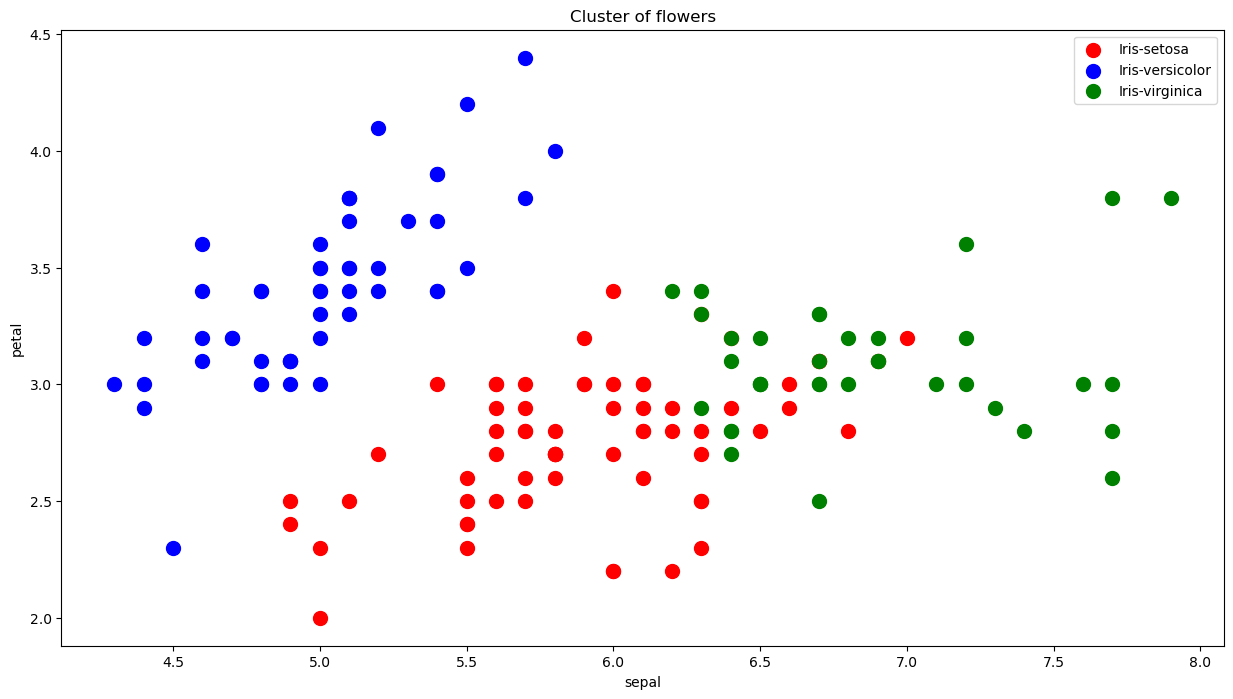

In [59]:
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label='Iris-versicolor')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label='Iris-virginica')

plt.title('Cluster of flowers')
plt.xlabel('sepal')
plt.ylabel('petal')
plt.legend()
plt.ioff()
plt.show()